# Signale

- Sprachsignal

<IPython.core.display.Javascript object>


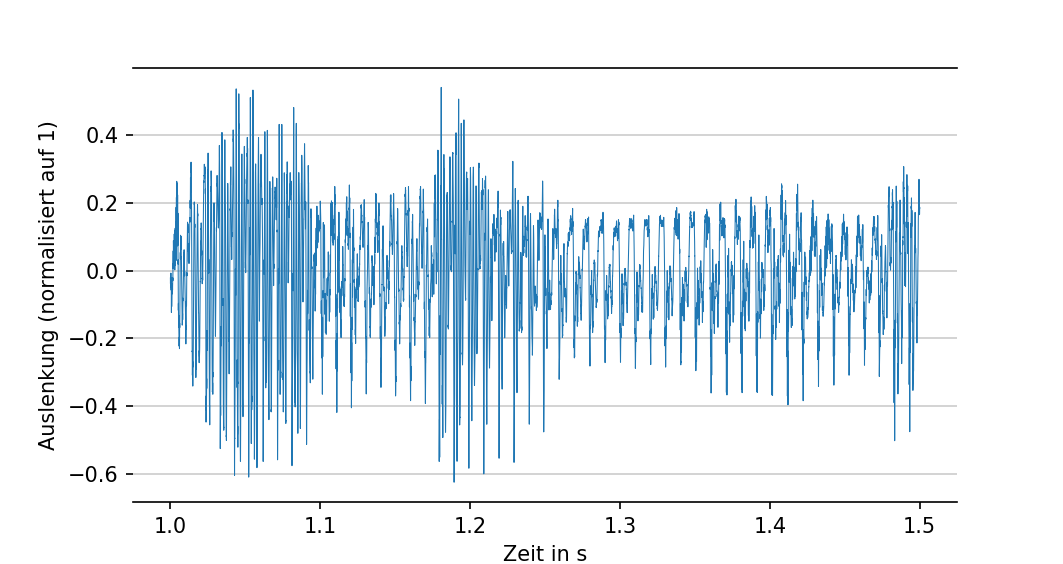

In [1]:
# Abbildung 2.1
#%matplotlib notebook
import matplotlib
import soundfile
import numpy
from matplotlib import pyplot
from myst_nb import glue

#pyplot.ion()

#matplotlib.style.use('sv1_style.mplstyle')

signal, samplerate = soundfile.read('data/Testsatz.wav') #reads signal and samplerate of the sound file
time = numpy.linspace(0, len(signal)/samplerate, len(signal)) # creates time vector in seconds

# Figure 1.1: cutting out a part of the signal

# setting start and end of the time
time_start = 1 # in seconds
time_end = 1.5 # in seconds

# cuts signal and time
sample_start = int(time_start * samplerate) # calculates the starting sample
sample_end = int(time_end * samplerate) # and the end sample
short_signal = signal[sample_start:sample_end] # cuts out the chosen timeframe from the signal 
short_time = time[sample_start:sample_end] # cuts the corresponding time vector

# plots
fig, ax = pyplot.subplots() # creates subplot
ax.plot(short_time, short_signal, label='Ausschnitt vom Sprachsignal', linewidth = 0.5)
ax.grid(axis='y', color='0.8')
ax.set(xlabel='Zeit in s', ylabel='Auslenkung (normalisiert auf 1)')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.arrow(1, -0.68, 0.4, 0, head_width=0.05, head_length=0.1)

# displays
#pyplot.show()


# glue this figure to paste it later
glue("sprachsignal", fig, display=False)

```{glue:figure} sprachsignal
:figwidth: 75%
:name: "plt:sprachsignal"

Typischer Amplitudenverlauf über der Zeit eines Sprachsignals.
```

- DAX-Abschlusskurse

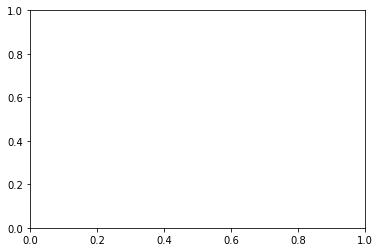

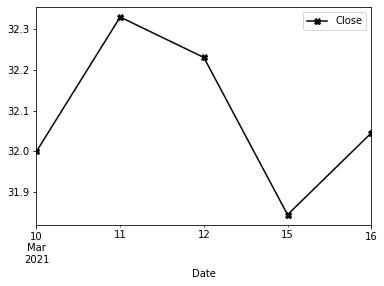

In [1]:
import yfinance
import matplotlib
from matplotlib import pyplot
import pandas
from myst_nb import glue

# matplotlib.style.use('../PicGenerierungPython/sv1_style.mplstyle')

fig, ax = pyplot.subplots() # creates subplot
dax = yfinance.Ticker("DAX") # wähle Aktie aus
data = dax.history(period="1wk") # hole Kursdaten bis 1 Woche zurückliegend
close = data[["Close"]] # extrahiere den Stand am Ende des Tages
close.plot(marker='X', color='black') # und plotte ihn
#pyplot.show()
glue("daxkurs", pyplot.gcf(), display=False)

```{glue:figure} daxkurs
:figwidth: 75%
:name: "plt:daxkurs"

Verlauf des DAX Abschlusskurses über mehrere Tage.
```

- Verkehrsampelsignale

In [ ]:
import matplotlib
import numpy
from matplotlib import pyplot
from matplotlib.widgets import RadioButtons
from myst_nb import glue
#import time

#matplotlib.style.use('../PicGenerierungPython/sv1_style.mplstyle')

current_light = "Rot" 
t = [0, 0.03, 0.06, 0.09] # Zeitvektor mit 
lights = ["Grün", "Gelb", "Gelb/Rot", "Rot"] # Anfangswerte um Plot in Ampelreihenfolge zu bringen
d_t = 0.03 # Zeit nach einem Durchlauf in s
cur_t = 0.09

# plots 
matplotlib.pyplot.ion() # Schaltet den interaktiven modus an was einen kontinuierliche änderung der Grafik möglich macht, andernfalls würde bei pyplot.show() erst weitergemacht werden, wenn die Grafik geschlossen wurde, was es unmöglich macht sie zu ändern
fig, ax = pyplot.subplots()
line, = ax.step(t, lights, where='post') # defines the steps of a step diagram
ax.grid(axis='x', color='0.8')
ax.set(xlabel='Zeit in s', ylabel='Ampelfarbe')
ax.set_xlim((0, 100))

fig.subplots_adjust(left=0.3)
rax = pyplot.axes([0.05, 0.15, 0.15, 0.75], facecolor='lightgoldenrodyellow')
radio = RadioButtons(rax, ('Rot', 'Gelb', 'Grün'))

def lights_change(label):
    '''
    Wählt richtige Ampelfarbe aus
    '''
    
    global current_light
    
    if(label=='Rot'):
        current_light="Rot"
    elif(label=='Gelb'):
        # nach grün ist die Ampel gelb/rot
        if(current_light=="Grün"):
            current_light="Gelb/Rot"
        # nach rot wird sie gelb
        elif(current_light=="Rot"):
            current_light="Gelb"
    elif(label=='Grün'):
        current_light="Grün"

# ruft "lights_change" auf wenn button gedrückt wurde
radio.on_clicked(lights_change)

#pyplot.show()

# Schleife läuft bis Programm abbricht
#while(True):
for i in range(1000):
    cur_t += d_t
    # vektoren anhängen
    t = t + [cur_t]
    lights = lights + [current_light] 
    # daten updaten
    line.set_xdata(t)
    line.set_ydata(lights)
    # 30 ms warten
    #pyplot.pause(d_t)
    ax.set(xlim=[0, cur_t])

glue("verkehrsampel", fig, display=False)


```{glue:figure} verkehrsampel
:figwidth: 75%
:name: "plt:verkehrsampel"

Ampelsignal im normalen Betrieb.
```


```{Admonition} Hinweis 
Aus der Mathematik ist die Kurzform $y = x^2$ geläufiger als $y(x) = x^2$.}.
```

### Kanalanzahl

$$
  z(t) = x(t) + j\;y(t)
$$